In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [3]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [4]:

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [5]:

adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                            n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [6]:

stump_acc = stump.score(X_test, y_test)
stump_auc = roc_auc_score(y_test, stump.predict_proba(X_test)[:,1])

ada_acc = adaboost.score(X_test, y_test)
ada_auc = roc_auc_score(y_test, adaboost.predict_proba(X_test)[:,1])

In [7]:

results = pd.DataFrame({
    'Model': ['Decision Stump', 'AdaBoost'],
    'Accuracy': [stump_acc, ada_acc],
    'ROC-AUC': [stump_auc, ada_auc]
})

In [8]:

print("Performance Comparison:")
print(results.to_string(index=False))

Performance Comparison:
         Model  Accuracy  ROC-AUC
Decision Stump  0.894737 0.897150
      AdaBoost  0.964912 0.992139


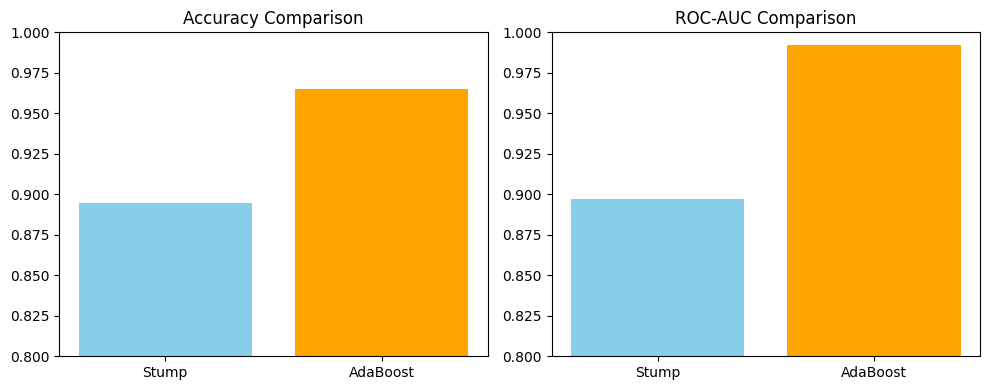


AdaBoost improved accuracy by 7.0% and ROC-AUC by 9.5%
by combining multiple weak learners into a strong ensemble.


In [9]:

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(['Stump', 'AdaBoost'], [stump_acc, ada_acc], color=['skyblue', 'orange'])
plt.title('Accuracy Comparison')
plt.ylim(0.8, 1.0)

plt.subplot(1, 2, 2)
plt.bar(['Stump', 'AdaBoost'], [stump_auc, ada_auc], color=['skyblue', 'orange'])
plt.title('ROC-AUC Comparison')
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

print("\nAdaBoost improved accuracy by {:.1%} and ROC-AUC by {:.1%}".format(
    ada_acc-stump_acc, ada_auc-stump_auc))
print("by combining multiple weak learners into a strong ensemble.")